In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [6]:
!wget -nc https://lazyprogrammer.me/course_files/charmander-tight.png

--2020-08-18 21:44:48--  https://lazyprogrammer.me/course_files/charmander-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3952 (3.9K) [image/png]
Saving to: ‘charmander-tight.png’

charmander-tight.pn 100%[===================>]   3.86K  --.-KB/s    in 0s      

2020-08-18 21:44:48 (65.7 MB/s) - ‘charmander-tight.png’ saved [3952/3952]



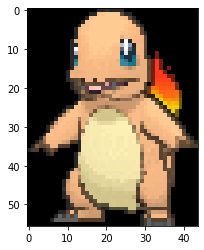

In [7]:
ch = image.load_img('charmander-tight.png')
plt.imshow(ch)
plt.show()

In [8]:
type(ch)

PIL.Image.Image

In [9]:
IMG_SIZE = 200
ch = np.array(ch)
CH_H, CH_W, _ = ch.shape

def image_generator(batch_size=5):
  while True:
      X = np.zeros((batch_size, IMG_SIZE, IMG_SIZE, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        row0 = np.random.randint(IMG_SIZE - CH_H)
        col0 = np.random.randint(IMG_SIZE - CH_W)
        row1 = row0 + CH_H
        col1 = col0 + CH_W

        X[i, row0:row1, col0:col1, :] = ch[:,:,:]
        Y[i, 0] = row0 / IMG_SIZE
        Y[i, 1] = col0 / IMG_SIZE
        Y[i, 2] = (row1 - row0) / IMG_SIZE
        Y[i, 3] = (col1 - col0) / IMG_SIZE

      yield X / 255.0, Y

In [10]:
ch.shape

(56, 44, 3)

In [11]:
def make_model():
  vgg = tf.keras.applications.VGG16(
      input_shape=[IMG_SIZE, IMG_SIZE, 3], 
      include_top=False, 
      weights='imagenet')
  x = Flatten()(vgg.output)
  x = Dense(4, activation='sigmoid')(x)
  model = Model(vgg.input, x)

  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

  return model

In [12]:
model = make_model()
model.fit(
    image_generator(),
    steps_per_epoch=50,
    epochs=5
)

58892288/58889256 [==============================] - 1s 0us/step
Epoch 1/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6917
Epoch 2/5
50/50 [==============================] - 4s 79ms/step - loss: 0.5676
Epoch 3/5
50/50 [==============================] - 4s 79ms/step - loss: 0.5591
Epoch 4/5
50/50 [==============================] - 4s 80ms/step - loss: 0.5535
Epoch 5/5
50/50 [==============================] - 4s 80ms/step - loss: 0.5541


In [31]:
def pokemon_prediction():
  x = np.zeros((IMG_SIZE, IMG_SIZE, 3))
  row0 = np.random.randint(IMG_SIZE - CH_H)
  col0 = np.random.randint(IMG_SIZE - CH_W)
  row1 = row0 + CH_H
  col1 = col0 + CH_W

  x[row0:row1, col0:col1, :] = ch[:,:,:]
  print([row0, col0, row1, col1])

  # Predict
  X = np.expand_dims(x, 0) / 255.0
  p = model.predict(X)[0]
  print((p*IMG_SIZE).astype(int).tolist())
  
  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x.astype(np.uint8))
  rect = Rectangle(
      (p[1]*IMG_SIZE, p[0]*IMG_SIZE),
      p[3]*IMG_SIZE, 
      p[2]*IMG_SIZE, 
      linewidth=1, 
      edgecolor='r', 
      facecolor='none')
  ax.add_patch(rect)
  plt.show()

[34, 109, 90, 153]
[34, 114, 55, 43]


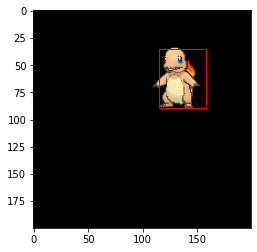

In [35]:
pokemon_prediction()